This notebook shows an example of using historical stock data from a number of metals, to predict the future price of gold!

In [1]:
## Import relevant libraries ##

#Standard libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import matplotlib.pyplot as plt


#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Data Generation

In [2]:
## Load our data from yfinance ##

#Download our data
tickers = 'GC=F PL=F PA=F SI=F HG=F' # Gold, Platinum, Palladium, Silver, Copper
data = yf.download(tickers = tickers, start = '2000-08-30', end = '2023-12-31', interval = '1d', ignore_tz = True, auto_adjust=True)

#Retrieve only the close price and rename the columns so they are easier to understand
df = data['Close'].copy()
df = df.rename(columns={'GC=F': 'Gold', 'HG=F': 'Copper', 'PL=F': 'Platinum', 'PA=F': 'Palladium', 'SI=F': 'Silver'})
df

[*********************100%***********************]  5 of 5 completed


Ticker                            Gold  Copper    Palladium     Platinum  \
Date                                                                       
2000-08-30 00:00:00+00:00   273.899994  0.8850   711.049988   591.400024   
2000-08-31 00:00:00+00:00   278.299988  0.8850   716.750000   586.700012   
2000-09-01 00:00:00+00:00   277.000000  0.8890   724.700012   595.299988   
2000-09-05 00:00:00+00:00   275.799988  0.9060   720.650024   601.299988   
2000-09-06 00:00:00+00:00   274.200012  0.9015   738.000000   611.099976   
...                                ...     ...          ...          ...   
2023-12-22 00:00:00+00:00  2057.100098  3.8955  1212.199951   979.500000   
2023-12-26 00:00:00+00:00  2058.199951  3.8955  1177.900024   980.099976   
2023-12-27 00:00:00+00:00  2081.899902  3.9435  1144.800049  1000.099976   
2023-12-28 00:00:00+00:00  2073.899902  3.9130  1133.800049  1007.400024   
2023-12-29 00:00:00+00:00  2062.399902  3.8805  1104.000000   995.000000   

Ticker                        Silver  
Date                                  
2000-08-30 00:00:00+00:00   4.930000  
2000-08-31 00:00:00+00:00   5.003000  
2000-09-01 00:00:00+00:00   5.004000  
2000-09-05 00:00:00+00:00   4.998000  
2000-09-06 00:00:00+00:00   4.983000  
...                              ...  
2023-12-22 00:00:00+00:00  24.290001  
2023-12-26 00:00:00+00:00  24.143999  
2023-12-27 00:00:00+00:00  24.375000  
2023-12-28 00:00:00+00:00  24.134001  
2023-12-29 00:00:00+00:00  23.853001  

[5864 rows x 5 columns]

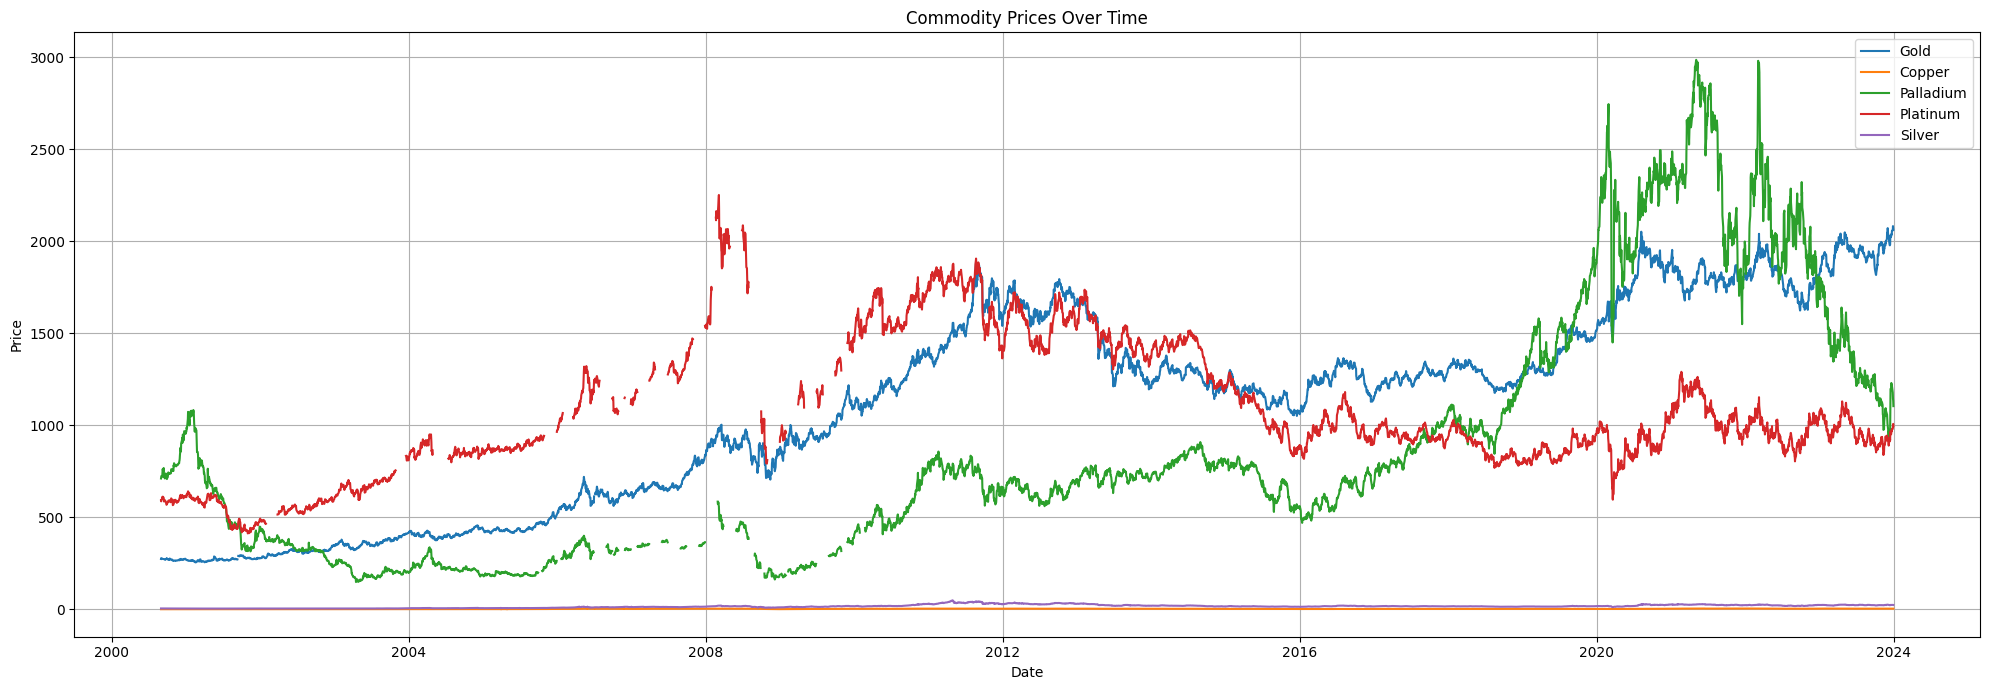

In [3]:
#####

# Plot a graph of close price over time to see change in prices of each commodity over time
# We can then use the data of the other commodities to predict the price of gold using machine learning

#####


plt.figure(figsize=(20, 7))
for commodity in df.columns:  # Iterate over each commodity (Gold, Copper, etc.)
    plt.plot(df.index, df[commodity], label=commodity)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Commodity Prices Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

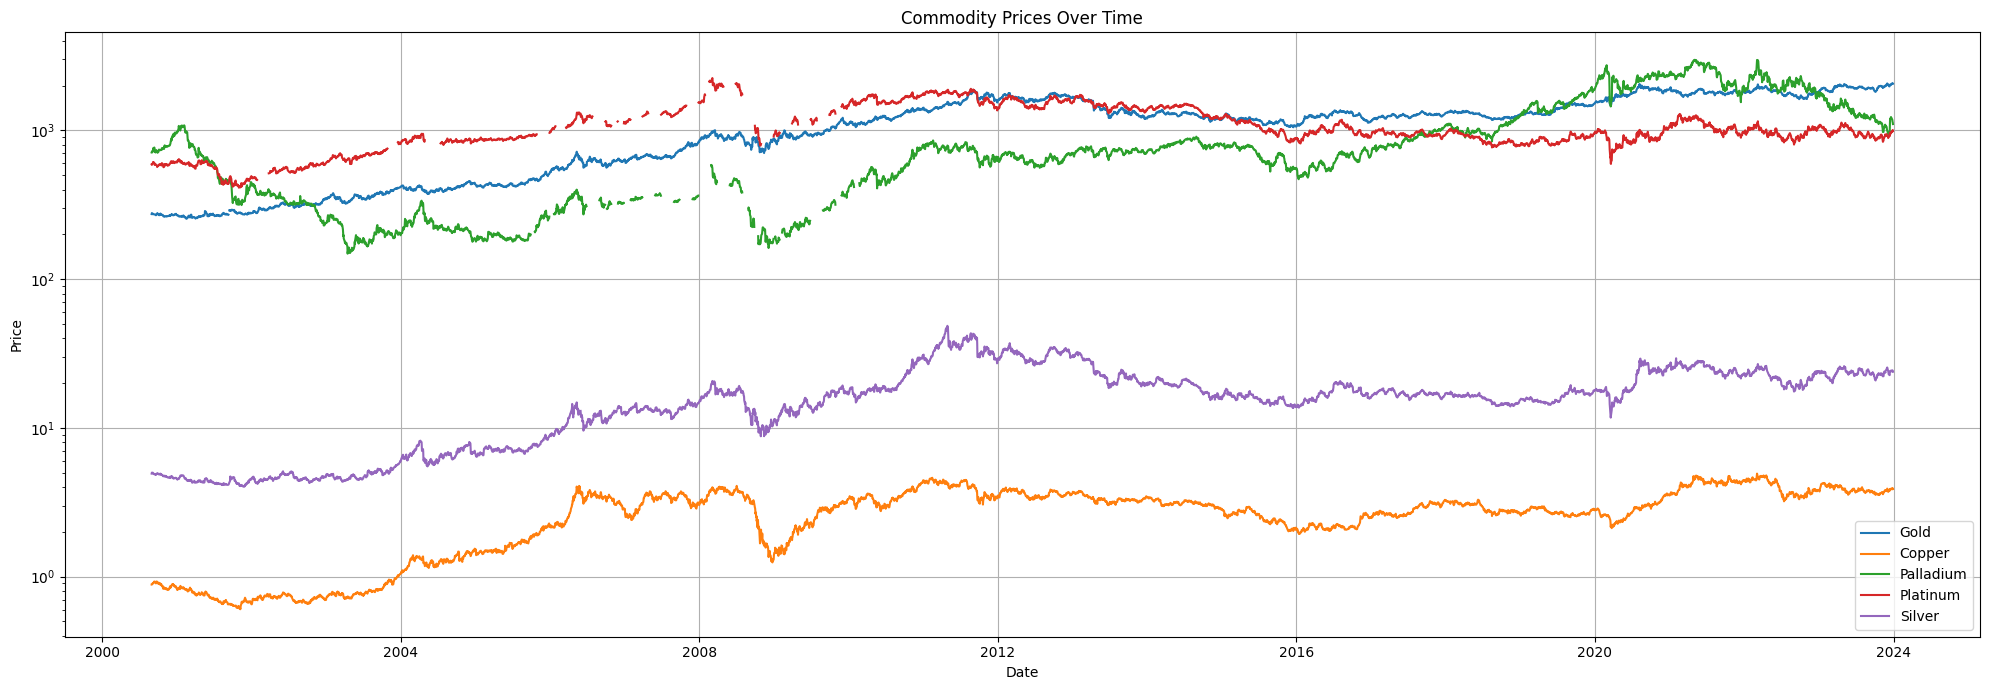

In [4]:
plt.figure(figsize=(20, 7))
for commodity in df.columns:  # Iterate over each commodity (Gold, Copper, etc.)
    plt.plot(df.index, df[commodity], label=commodity)

plt.yscale('log')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Commodity Prices Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Data Preprocessing

We preprocess the data so it is in a form suitable for machine learning algorithms to work. This can vary from cleaning (i.e. removing NaN values), transforming, encoding and scaling our data (normalising or standardising).

In [5]:
## Calculate the percentage change and clean our data ##

df = df.pct_change().dropna().reset_index().rename_axis(None, axis=1) # Calculate percentage change, drop the NaN columns, reset the index and remove the axis name
df

<ipython-input-5-753ca74fbad5>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df = df.pct_change().dropna().reset_index().rename_axis(None, axis=1) # Calculate percentage change, drop the NaN columns, reset the index and remove the axis name


Date      Gold    Copper  Palladium  Platinum  \
0    2000-08-31 00:00:00+00:00  0.016064  0.000000   0.008016 -0.007947   
1    2000-09-01 00:00:00+00:00 -0.004671  0.004520   0.011092  0.014658   
2    2000-09-05 00:00:00+00:00 -0.004332  0.019123  -0.005589  0.010079   
3    2000-09-06 00:00:00+00:00 -0.005801 -0.004967   0.024075  0.016298   
4    2000-09-07 00:00:00+00:00 -0.000729  0.004992   0.031572 -0.007527   
...                        ...       ...       ...        ...       ...   
5858 2023-12-22 00:00:00+00:00  0.008827 -0.003326  -0.003699  0.012298   
5859 2023-12-26 00:00:00+00:00  0.000535  0.000000  -0.028296  0.000613   
5860 2023-12-27 00:00:00+00:00  0.011515  0.012322  -0.028101  0.020406   
5861 2023-12-28 00:00:00+00:00 -0.003843 -0.007734  -0.009609  0.007299   
5862 2023-12-29 00:00:00+00:00 -0.005545 -0.008306  -0.026283 -0.012309   

        Silver  
0     0.014807  
1     0.000200  
2    -0.001199  
3    -0.003001  
4    -0.009633  
...        ...  
5858 -0.000699  
5859 -0.006011  
5860  0.009568  
5861 -0.009887  
5862 -0.011643  

[5863 rows x 6 columns]

We will choose Silver, Platinum, Copper and Palladium as the input for our various ML models

In [6]:
## Filter our dataset based on the metals we want to use as features, to predict gold price ##

input_col = ['Silver', 'Platinum', 'Copper', 'Palladium']
x = df[input_col]
x

Silver  Platinum    Copper  Palladium
0     0.014807 -0.007947  0.000000   0.008016
1     0.000200  0.014658  0.004520   0.011092
2    -0.001199  0.010079  0.019123  -0.005589
3    -0.003001  0.016298 -0.004967   0.024075
4    -0.009633 -0.007527  0.004992   0.031572
...        ...       ...       ...        ...
5858 -0.000699  0.012298 -0.003326  -0.003699
5859 -0.006011  0.000613  0.000000  -0.028296
5860  0.009568  0.020406  0.012322  -0.028101
5861 -0.009887  0.007299 -0.007734  -0.009609
5862 -0.011643 -0.012309 -0.008306  -0.026283

[5863 rows x 4 columns]

In [7]:
## Specify the data that will be the output of our model - the data we want to predict ##

output_col = ['Gold']
y = df[output_col]
y

Gold
0     0.016064
1    -0.004671
2    -0.004332
3    -0.005801
4    -0.000729
...        ...
5858  0.008827
5859  0.000535
5860  0.011515
5861 -0.003843
5862 -0.005545

[5863 rows x 1 columns]

When doing machine learning, we break up our dataset into additional sets to train and test our model, known as splitting the data into a **training set** and **testing set**. We use our training set to train the model, whereas the test set is unseen data used to evaluate the performance of the model, i.e. whether it is capable of accurately predicting future values.

An example is shown below:

In [9]:
## Perform a train test split on our data, using 80% to train the model and the remaining 20% to predict and test the model's accuracy ##
# For more information visit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

training_fraction = 0.2 # This specifies the % of data we test on
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=training_fraction, shuffle=False)

# Classification

### Logistic Regression

In [10]:
## Import relevant ML model ##

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
## Add 1 day lag to the closing prices ##

y_clf = y.copy()
y_clf = y_clf.shift(-1).dropna()

# We want to set a positive percentange change of closing prices for the next day to be 1 and negative changes to be 0 for our classification model
y_clf['Gold'].values[y_clf['Gold'].values >= 0] = 1
y_clf['Gold'].values[y_clf['Gold'].values < 0] = 0
y_clf

Gold
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
5857   1.0
5858   1.0
5859   1.0
5860   0.0
5861   0.0

[5862 rows x 1 columns]

**Does anyone know why we add a one day lag here?**

In [12]:
x_clf = x.copy()
x_clf = x_clf[:-1]

x_clf

Silver  Platinum    Copper  Palladium
0     0.014807 -0.007947  0.000000   0.008016
1     0.000200  0.014658  0.004520   0.011092
2    -0.001199  0.010079  0.019123  -0.005589
3    -0.003001  0.016298 -0.004967   0.024075
4    -0.009633 -0.007527  0.004992   0.031572
...        ...       ...       ...        ...
5857 -0.001643 -0.003809  0.001794   0.001070
5858 -0.000699  0.012298 -0.003326  -0.003699
5859 -0.006011  0.000613  0.000000  -0.028296
5860  0.009568  0.020406  0.012322  -0.028101
5861 -0.009887  0.007299 -0.007734  -0.009609

[5862 rows x 4 columns]

In [13]:
## Perform a train test split on our data ##

training_fraction = 0.2
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=training_fraction, shuffle=False)

In [14]:
## Create our machine learning model ##

# Create logistic regression object
model = LogisticRegression(class_weight='balanced')

# Fit model with the data
model.fit(x_train_clf, y_train_clf.values.ravel()) # .ravel() just flattens the column vector into a 1D array

LogisticRegression(class_weight='balanced')

In [15]:
# Generate predictions
log_pred = model.predict(x_test_clf) # We can predict the y_test values based off our model and x_test
log_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [16]:
dates_clf = df['Date'].shift(-1)

# Store our logistic regression predictions in df
clf_df = pd.DataFrame(dates_clf[len(x_train_clf):]).join(y_clf) # Create a new dataframe with the dates of our of our train dataset and join it to our y_clf (Gold)
clf_df = clf_df.dropna() # Clean the dataframe
clf_df['Logistic Regression'] = log_pred # Add a column with our model predictions
clf_df

Date  Gold  Logistic Regression
4689 2019-05-07 00:00:00+00:00   1.0                  1.0
4690 2019-05-08 00:00:00+00:00   0.0                  1.0
4691 2019-05-09 00:00:00+00:00   1.0                  1.0
4692 2019-05-10 00:00:00+00:00   1.0                  1.0
4693 2019-05-13 00:00:00+00:00   1.0                  0.0
...                        ...   ...                  ...
5857 2023-12-22 00:00:00+00:00   1.0                  1.0
5858 2023-12-26 00:00:00+00:00   1.0                  1.0
5859 2023-12-27 00:00:00+00:00   1.0                  1.0
5860 2023-12-28 00:00:00+00:00   0.0                  0.0
5861 2023-12-29 00:00:00+00:00   0.0                  1.0

[1173 rows x 3 columns]

In [17]:
##  Accuracy of model predictions ##

log_acc = model.score(x_test_clf, y_test_clf)
print(log_acc)

0.5038363171355499


Confusion matrix is used to measure the performance of a classifier by counting the times of correct predictions (similar to comparing actual vs predicted values).

|| Predicted `Negative` | Predicted `Positive` |
|--|--|--|
|<b>Real `Negative`</b>|True Negatives| False Positives|
|<b>Real `Positive`</b> | False Negatives|True Positives|

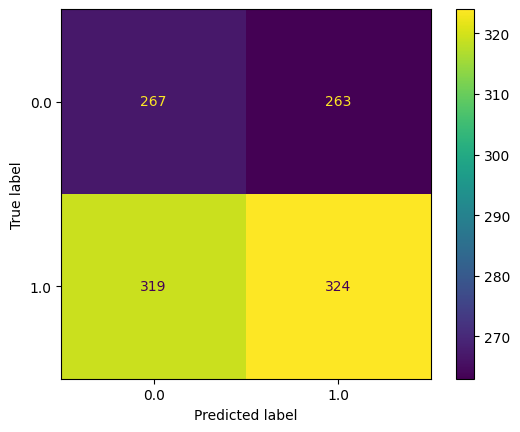

In [18]:
## Plot our confusion matrix ##

cm = confusion_matrix(y_test_clf, log_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Alternatives to visualise this is a ROC curve: https://scikit-learn.org/1.0/auto_examples/model_selection/plot_roc.html

In [19]:
## Calculate cumulative returns according to our machine learning model ##

gold_returns = df['Gold'].shift(-1)
clf_df['Cumulative Returns'] = (clf_df['Logistic Regression'] * gold_returns[len(x_train_clf):]).cumsum() # Multiplying the logistic regression outcome (0 or 1) by the value of gold in our df
clf_df

Date  Gold  Logistic Regression  Cumulative Returns
4689 2019-05-07 00:00:00+00:00   1.0                  1.0            0.001404
4690 2019-05-08 00:00:00+00:00   0.0                  1.0           -0.001790
4691 2019-05-09 00:00:00+00:00   1.0                  1.0            0.001415
4692 2019-05-10 00:00:00+00:00   1.0                  1.0            0.003129
4693 2019-05-13 00:00:00+00:00   1.0                  0.0            0.003129
...                        ...   ...                  ...                 ...
5857 2023-12-22 00:00:00+00:00   1.0                  1.0            0.574860
5858 2023-12-26 00:00:00+00:00   1.0                  1.0            0.575394
5859 2023-12-27 00:00:00+00:00   1.0                  1.0            0.586909
5860 2023-12-28 00:00:00+00:00   0.0                  0.0            0.586909
5861 2023-12-29 00:00:00+00:00   0.0                  1.0            0.581364

[1173 rows x 4 columns]

In [20]:
## Backtesting with test data ##

fig = go.Figure()
fig.add_trace(go.Scatter(x=clf_df['Date'], y=clf_df['Cumulative Returns'], mode='lines', name='Actual'))

fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Returns',
                  title=f'Gold Price - Logistic Regression Prediction Accuracy = {log_acc:.2f}')
fig.update_traces(line=dict(width=1))
fig.show()

# Regression

### Linear Regression

In [22]:
## Import relevant ML model ##

from sklearn.linear_model import LinearRegression

In [23]:
input_col = ['Silver', 'Platinum', 'Copper', 'Palladium']
x = df[input_col]
output_col = ['Gold']
y = df[output_col]

In [24]:
## Add 1 day lag to the closing prices ##
y = y.shift(-1).dropna()
y

Gold
0    -0.004671
1    -0.004332
2    -0.005801
3    -0.000729
4    -0.002555
...        ...
5857  0.008827
5858  0.000535
5859  0.011515
5860 -0.003843
5861 -0.005545

[5862 rows x 1 columns]

In [25]:
x = x[:-1]
x

Silver  Platinum    Copper  Palladium
0     0.014807 -0.007947  0.000000   0.008016
1     0.000200  0.014658  0.004520   0.011092
2    -0.001199  0.010079  0.019123  -0.005589
3    -0.003001  0.016298 -0.004967   0.024075
4    -0.009633 -0.007527  0.004992   0.031572
...        ...       ...       ...        ...
5857 -0.001643 -0.003809  0.001794   0.001070
5858 -0.000699  0.012298 -0.003326  -0.003699
5859 -0.006011  0.000613  0.000000  -0.028296
5860  0.009568  0.020406  0.012322  -0.028101
5861 -0.009887  0.007299 -0.007734  -0.009609

[5862 rows x 4 columns]

In [26]:
training_fraction = 0.2 # This specifies the % of data we test on
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=training_fraction, shuffle=False)

In [27]:
## Create our model - note that this is regression and no longer classification, so we are predicting how gold will move ##

# Create linear regression object
model = LinearRegression()

# Fit model with the data
model.fit(x_train, y_train)

# Generate predictions
lin_pred = model.predict(x_test)

In [28]:
shifted_dates = df['Date'].shift(-1).dropna()
shifted_return = df['Gold'].shift(-1).dropna()

In [29]:
# Store predictions in df
predict_df = pd.DataFrame(shifted_dates[len(x_train):])
predict_df['Actual'] = shifted_return[len(x_train):]
predict_df['Linear Regression'] = lin_pred
predict_df

Date    Actual  Linear Regression
4689 2019-05-07 00:00:00+00:00  0.001404           0.000587
4690 2019-05-08 00:00:00+00:00 -0.003194           0.000303
4691 2019-05-09 00:00:00+00:00  0.003205           0.000177
4692 2019-05-10 00:00:00+00:00  0.001714           0.000039
4693 2019-05-13 00:00:00+00:00  0.011200           0.000868
...                        ...       ...                ...
5857 2023-12-22 00:00:00+00:00  0.008827           0.000282
5858 2023-12-26 00:00:00+00:00  0.000535           0.000799
5859 2023-12-27 00:00:00+00:00  0.011515           0.000479
5860 2023-12-28 00:00:00+00:00 -0.003843           0.000717
5861 2023-12-29 00:00:00+00:00 -0.005545           0.000821

[1173 rows x 3 columns]

In [30]:
## Error metric - alternatives are MSE or RMSE ##

lin_mae = mean_absolute_error(y_test, lin_pred)
lin_mae

0.007149397107270681

In [31]:
## Backtesting with test data ##

fig = go.Figure()
fig.add_trace(go.Scatter(x=shifted_dates[len(x_train):], y=shifted_return[len(x_train):], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=predict_df['Date'], y=predict_df['Linear Regression'], mode='lines', name='Predicted'))

fig.update_layout(xaxis_title='Date', yaxis_title='Percentage Change',
                  title=f'Gold Price - Linear Regression MAE = {lin_mae:.2f}')
fig.update_traces(line=dict(width=1))
fig.show()

In [32]:
## Actual vs Predicted plot ##

fig = go.Figure()
fig.add_trace(go.Scatter(x=predict_df['Actual'], y=predict_df['Linear Regression'], mode='markers', name='Model prediction'))

# Adding a line of "perfect" fit to visualise error
fig.add_trace(go.Scatter(x=predict_df['Actual'], y=1*predict_df['Actual'], mode='lines'))

fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted',
                  title=f'Gold Price - Linear Regression MAE = {lin_mae:.2f}',
                  xaxis_range=[-0.05,0.05], yaxis_range=[-0.05,0.05], showlegend=False)
fig.show()

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
# Create decision tree object
model = DecisionTreeRegressor(random_state=42)

# Fit model with the data
model.fit(x_train, y_train)

# Generate predictions
dt_pred = model.predict(x_test)
predict_df['Decision Tree'] = dt_pred
predict_df

Date    Actual  Linear Regression  Decision Tree
4689 2019-05-07 00:00:00+00:00  0.001404           0.000587      -0.001466
4690 2019-05-08 00:00:00+00:00 -0.003194           0.000303      -0.006043
4691 2019-05-09 00:00:00+00:00  0.003205           0.000177       0.014773
4692 2019-05-10 00:00:00+00:00  0.001714           0.000039       0.001368
4693 2019-05-13 00:00:00+00:00  0.011200           0.000868       0.006681
...                        ...       ...                ...            ...
5857 2023-12-22 00:00:00+00:00  0.008827           0.000282      -0.000533
5858 2023-12-26 00:00:00+00:00  0.000535           0.000799      -0.004299
5859 2023-12-27 00:00:00+00:00  0.011515           0.000479       0.004297
5860 2023-12-28 00:00:00+00:00 -0.003843           0.000717      -0.010171
5861 2023-12-29 00:00:00+00:00 -0.005545           0.000821      -0.032743

[1173 rows x 4 columns]

In [35]:
# Error metric - alternatives are MSE or RMSE
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mae

0.011144700051519437

In [36]:
# Backtesting with test data
fig = go.Figure()
fig.add_trace(go.Scatter(x=shifted_dates[len(x_train):], y=shifted_return[len(x_train):], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=predict_df['Date'], y=predict_df['Decision Tree'], mode='lines', name='Predicted'))

fig.update_layout(xaxis_title='Date', yaxis_title='Percentage Change',
                  title=f'Gold Price - Decision Tree MAE = {dt_mae:.2f}')
fig.update_traces(line=dict(width=1))
fig.show()

In [37]:
# Actual vs Predicted plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=predict_df['Actual'], y=predict_df['Decision Tree'], mode='markers', name='Model pre'))
# line of "perfect" fit to visualise error
fig.add_trace(go.Scatter(x=predict_df['Actual'], y=1*predict_df['Actual'], mode='lines'))

fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted',
                  title=f'Gold Price - Decision Tree MAE = {lin_mae:.2f}',
                  xaxis_range=[-0.05,0.05], yaxis_range=[-0.05,0.05], showlegend=False)
fig.show()

# Hyperparameter Tuning

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Create random forest object
model = RandomForestRegressor(random_state=42)

# Create a simplified random grid for parameters to optimise the model
model_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

model = RandomizedSearchCV(
    model,
    model_params,
    n_iter=5,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Fit model with the data
model.fit(x_train, y_train.values.ravel())

# Print best set of hyperparameters for this model
best_params = model.best_estimator_.get_params()
print(best_params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [40]:
# Generate predictions
rf_pred = model.predict(x_test)
predict_df['Random Forest'] = rf_pred
predict_df

Date    Actual  Linear Regression  Decision Tree  \
4689 2019-05-07 00:00:00+00:00  0.001404           0.000587      -0.001466   
4690 2019-05-08 00:00:00+00:00 -0.003194           0.000303      -0.006043   
4691 2019-05-09 00:00:00+00:00  0.003205           0.000177       0.014773   
4692 2019-05-10 00:00:00+00:00  0.001714           0.000039       0.001368   
4693 2019-05-13 00:00:00+00:00  0.011200           0.000868       0.006681   
...                        ...       ...                ...            ...   
5857 2023-12-22 00:00:00+00:00  0.008827           0.000282      -0.000533   
5858 2023-12-26 00:00:00+00:00  0.000535           0.000799      -0.004299   
5859 2023-12-27 00:00:00+00:00  0.011515           0.000479       0.004297   
5860 2023-12-28 00:00:00+00:00 -0.003843           0.000717      -0.010171   
5861 2023-12-29 00:00:00+00:00 -0.005545           0.000821      -0.032743   

      Random Forest  
4689       0.001380  
4690       0.000645  
4691       0.000568  
4692      -0.000332  
4693       0.001701  
...             ...  
5857       0.000653  
5858       0.000812  
5859       0.001170  
5860       0.000729  
5861       0.001092  

[1173 rows x 5 columns]

In [41]:
# Error metric - alternatives are MSE or RMSE
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mae

0.007185551572523114

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=shifted_dates[len(x_train):], y=shifted_return[len(x_train):], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=predict_df['Date'], y=predict_df['Random Forest'], mode='lines', name='Predicted'))

fig.update_layout(xaxis_title='Date', yaxis_title='Percentage Change',
                  title=f'Gold Price - Random Forest MAE = {rf_mae:.10f}')
fig.update_traces(line=dict(width=1))
fig.show()

In [43]:
# Actual vs Predicted plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=predict_df['Actual'], y=predict_df['Random Forest'], mode='markers', name='Model pre'))
# line of "perfect" fit to visualise error
fig.add_trace(go.Scatter(x=predict_df['Actual'], y=1*predict_df['Actual'], mode='lines'))

fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted',
                  title=f'Gold Price - Random Forest MAE = {lin_mae:.10f}',
                  xaxis_range=[-0.05,0.05], yaxis_range=[-0.05,0.05], showlegend=False)
fig.show()